In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
btc_usd = pd.read_csv("BTC-USD.csv")
btc_usd = btc_usd.loc[:,["Date","Close"]]
btc_cad = pd.read_csv("BTC-CAD.csv")
btc_cad = btc_cad.loc[:,["Date","Close"]]
btc_eur = pd.read_csv("BTC-EUR.csv")
btc_eur = btc_eur.loc[:,["Date","Close"]]
btc_gbp = pd.read_csv("BTC-GBP.csv")
btc_gbp = btc_gbp.loc[:,["Date","Close"]]
eur_cad = pd.read_csv("EUR-CAD.csv")
eur_cad = eur_cad.loc[:,["Date","Close"]]
eur_gbp = pd.read_csv("EUR-GBP.csv")
eur_gbp = eur_gbp.loc[:,["Date","Close"]]
eur_usd = pd.read_csv("EUR-USD.csv")
eur_usd = eur_usd.loc[:,["Date","Close"]]
gbp_cad = pd.read_csv("GBP-CAD.csv")
gbp_cad = gbp_cad.loc[:,["Date","Close"]]
gbp_usd = pd.read_csv("GBP-USD.csv")
gbp_usd = gbp_usd.loc[:,["Date","Close"]]
cad_usd = pd.read_csv("CAD-USD.csv")
cad_usd = cad_usd.loc[:,["Date","Close"]]

Section below will look at the influence of triangular arbitrage on cross-currency correlation. We will mainly focus on three currencies: USD, GBP, and BTC.

We will look at the possibility of same direction movement of two markets. If for the majority of time they move in the same direction, we may conclude that they tend to be more closely correlated. 

In [6]:
same = 0
for i in range(len(btc_usd["Close"])-1):
    if (btc_usd["Close"][i] < btc_usd["Close"][i + 1]) and (btc_gbp["Close"][i] < btc_gbp["Close"][i + 1]):
        same = same + 1
    elif (btc_usd["Close"][i] > btc_usd["Close"][i + 1]) and (btc_gbp["Close"][i] > btc_gbp["Close"][i + 1]):
        same = same + 1
samee = same/len(btc_usd["Close"])

<BarContainer object of 2 artists>

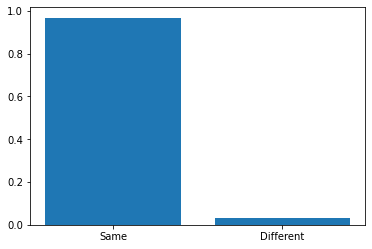

In [8]:
plt.bar(["Same","Different"],[samee,1-samee])

<BarContainer object of 2 artists>

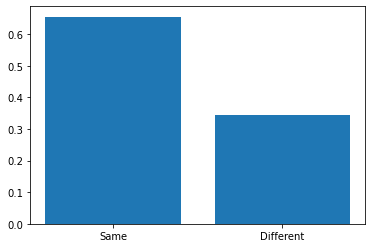

In [9]:
same = 0
for i in range(len(gbp_usd["Close"])-1):
    if (btc_usd["Close"][i] <= btc_usd["Close"][i + 1]) and (gbp_usd["Close"][i] <= gbp_usd["Close"][i + 1]):
        same = same + 1
    elif (btc_usd["Close"][i] >= btc_usd["Close"][i + 1]) and (gbp_usd["Close"][i] >= gbp_usd["Close"][i + 1]):
        same = same + 1
samee = same/len(btc_usd["Close"])
plt.bar(["Same","Different"],[samee,1-samee])

Then we look at movements in btc_gbp and gbp_usd market. Since btc_gbp indicates the price of btc in gbp while gbp_usd represents the price of gbp in usd. The same movement in two indices represents an opposite movement of price of gbp in two markets.Therefore, when calculate proportion of same direction movement, we need to take the compliment. 

Text(0.5, 1.0, 'possibility of same vs opposite movement in btc_gbp/gbp_usd market')

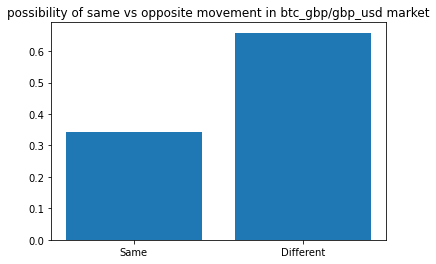

In [11]:
same = 0
for i in range(len(gbp_usd["Close"])-1):
    if (btc_gbp["Close"][i] <= btc_gbp["Close"][i + 1]) and (gbp_usd["Close"][i] <= gbp_usd["Close"][i + 1]):
        same = same + 1
    elif (btc_gbp["Close"][i] >= btc_gbp["Close"][i + 1]) and (gbp_usd["Close"][i] >= gbp_usd["Close"][i + 1]):
        same = same + 1
samee = 1-same/len(btc_usd["Close"])
plt.bar(["Same","Different"],[samee,1-samee])
plt.title("possibility of same vs opposite movement in btc_gbp/gbp_usd market")

Then we use df.corr function to calculate the correlation between those three currencies.

In [12]:
df = pd.DataFrame({"btc_usd":btc_usd["Close"],"btc_gbp":btc_gbp["Close"],"gbp_usd":gbp_usd["Close"]})

In [13]:
df.corr()

,btc_usd,btc_gbp,gbp_usd
btc_usd,1.000000,0.998515,0.183199
btc_gbp,0.998515,1.000000,0.187234
gbp_usd,0.183199,0.187234,1.000000


From graphs and calculation above, there seems to be a strong correlation between btc_usd and btc_gbp but weaker correlation between btc_gbp and gbp_usd and gbp_usd with btc_usd, which may imply possibility in arbitrage as the price of usd or gbp has the possibility to change differently in these two markets.

In [9]:
def create_exchange_table(date):
  """
  Contains exchange rates between the following currencies:
  Bitcoin, USD, Canadian Dollar, GBP, Euro
  """
  currencies = np.array(["usd", "btc", "cad", "gbp", "eur"])
  table_data = np.array([])
  for currency in currencies:
    new_row = np.array([convert_currency(currency, other, date) for other in currencies])
    if table_data.size == 0:
      table_data = np.array([new_row])
    else:
      table_data = np.vstack([table_data, new_row])
  return table_data


def convert_currency(curr1, curr2, date):
  """
  Converts from one currency to another by giving the exchange rate
  at a particular date
  """
  if curr1 == curr2:
    return 0
  try:
    name = curr1 + "_" + curr2
    table = eval(name)
    eq_to_date = table["Date"] == date
    return table[eq_to_date]["Close"].to_numpy().item(0)
  except NameError as err:
    name = curr2 + "_" + curr1
    table = eval(name)
    eq_to_date = table["Date"] == date
    return 1 / table[eq_to_date]["Close"].to_numpy().item(0)

In [12]:
mat = create_exchange_table("2020-11-30")

In [11]:
def karp_algorithm(g, n):
  """
  Implementation of Karp's algorithm to find the cycle in the graph with
  maximum normalized wieght.
  """

  # create V matrix
  identity = construct_identity(n)
  v_zero = identity[:, 2]
  V = np.array([v_zero])
  for i in range(1, n):
    new_vec = tropical_matmul(g, V[i - 1])
    V = np.vstack([V, new_vec])
  V = V.T

  # take appropriate max and min values and return result
  return max([min([(V[i][n - 1] - V[i][j]) / (n - 1 - j) for j in range(len(V[0]))]) for i in range(len(V))])

def construct_identity(size):
  """
  Helper function that constructs an identity matrix
  that supports tropical algebraic operations.
  """
  identity = np.full((size, size), -float('inf'))
  for i in range(size):
    identity[i][i] = 0
  return identity


def tropical_matmul(mat, vec):
  """
  Matrix multiplication using tropical addition and multiplication
  instead of standard arithmetic operations.
  """
  new_vec = np.array([])
  for i in range(len(mat)):
    new_vec = np.append(new_vec, tropical_dot(mat[i], vec))
  return new_vec


def tropical_dot(vec1, vec2):
  """
  Dot product using tropical algebra
  """
  total = []
  for i in range(len(vec1)):
    total.append(tropical_mult(vec1[i], vec2[i]))
  return tropical_add(*total)

def tropical_add(*args):
  """
  Addition using tropical algebra
  """
  return max(args)

def tropical_mult(a, b):
  """
  Multiplication using tropical algebra
  """
  return a + b


In [14]:
karp_algorithm(mat,5)

<ipython-input-11-41aab08a610d>:17: RuntimeWarning: invalid value encountered in double_scalars
  return max([min([(V[i][n - 1] - V[i][j]) / (n - 1 - j) for j in range(len(V[0]))]) for i in range(len(V))])


12749.177754109109